In [ ]:
from fastai import *
from fastai.collab import *
from fastai.tabular import *

## Collaborative filtering example

`collab` models use data in a `DataFrame` of user, items, and ratings.

In [ ]:
path = untar_data(URLs.ML_SAMPLE)
path

PosixPath('/home/jhoward/.fastai/data/movie_lens_sample')

In [ ]:
ratings = pd.read_csv(path/'ratings.csv')
user,item = 'userId','movieId'
series2cat(ratings, user, item)
ratings.head()

,userId,movieId,rating,timestamp
0,73,1097,4.0,1255504951
1,561,924,3.5,1172695223
2,157,260,3.5,1291598691
3,358,1210,5.0,957481884
4,130,316,2.0,1138999234


That's all we need to create and train a model:

In [ ]:
data = CollabDataBunch.from_df(ratings, seed=42)

In [ ]:
learn = get_collab_learner(data, n_factors=50, min_score=0., max_score=5.)

In [ ]:
learn.fit_one_cycle(3, 5e-3)

Total time: 00:04
epoch  train_loss  valid_loss
1      2.008944    1.105534    (00:01)
2      0.939829    0.673175    (00:01)
3      0.683284    0.666736    (00:01)



## use_nn=True

In [ ]:
learn = get_collab_learner(data, use_nn=True, layers=[10,10], min_score=0., max_score=5.)

In [ ]:
#10
learn.fit_one_cycle(5, 0.01)

Total time: 00:07
epoch  train_loss  valid_loss
1      1.982797    0.754775    (00:01)
2      0.936521    0.716633    (00:01)
3      0.740463    0.677073    (00:01)
4      0.657365    0.659864    (00:01)
5      0.605505    0.653693    (00:01)



## Collab filtering with tabular

In [ ]:
data = (TabularList.from_df(ratings, cat_names=[user, item], procs=Categorify)
        .random_split_by_pct(seed=42)
        .label_from_df(cols='rating')
        .databunch())

In [ ]:
learn = get_tabular_learner(data, layers=[10,10], y_range=[0,5.5])

In [ ]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(101, 50)
    (1): Embedding(101, 50)
  )
  (emb_drop): Dropout(p=0.0)
  (bn_cont): BatchNorm1d(0, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=100, out_features=10, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU(inplace)
    (5): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Linear(in_features=10, out_features=1, bias=True)
  )
)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


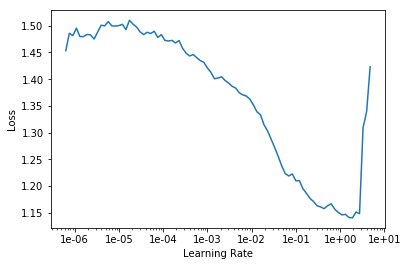

In [ ]:
learn.lr_find()
learn.recorder.plot(skip_end=3)

In [ ]:
#10
learn.fit_one_cycle(5, 0.01)

epoch,train_loss,valid_loss


RuntimeError: DataLoader worker (pid 56508) is killed by signal: Segmentation fault. 